In [117]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2023-7-1 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A_python_basic_course
# # @IDE     : Python 3.10.9 (main, Dec 15 2022, 18:18:30) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
# # @File    : ksp_novice_lec03.py 

In [118]:
import numpy as np
import numpy.matlib
import os
import sys
import math
import codecs
import matplotlib.pyplot as plt
import pandas as pd
from openpyxl import Workbook
import pprint
import datetime

In [119]:
import seaborn as sns 

In [120]:
import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

In [121]:
# !pip install sympy
#もし sympyがインストールされてなかったら上述の　コードを実行してください
import sympy as sym

In [122]:
# !pip install ffmpeg
# #もし ffmpeg-pythonがインストールされてあれば、下記だけで結構です
# import ffmpeg

In [123]:
# !echo y|conda install -c menpo ffmpeg

In [124]:
# conda install jupyter notebook

In [125]:
!pip install ffmpeg-python
#もし ffmpeg-pythonがインストールされてあれば、下記だけで結構です
import ffmpeg

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import ffmpeg

%matplotlib nbagg

### 5-1　アニメーションを描画する


<IPython.core.display.Javascript object>


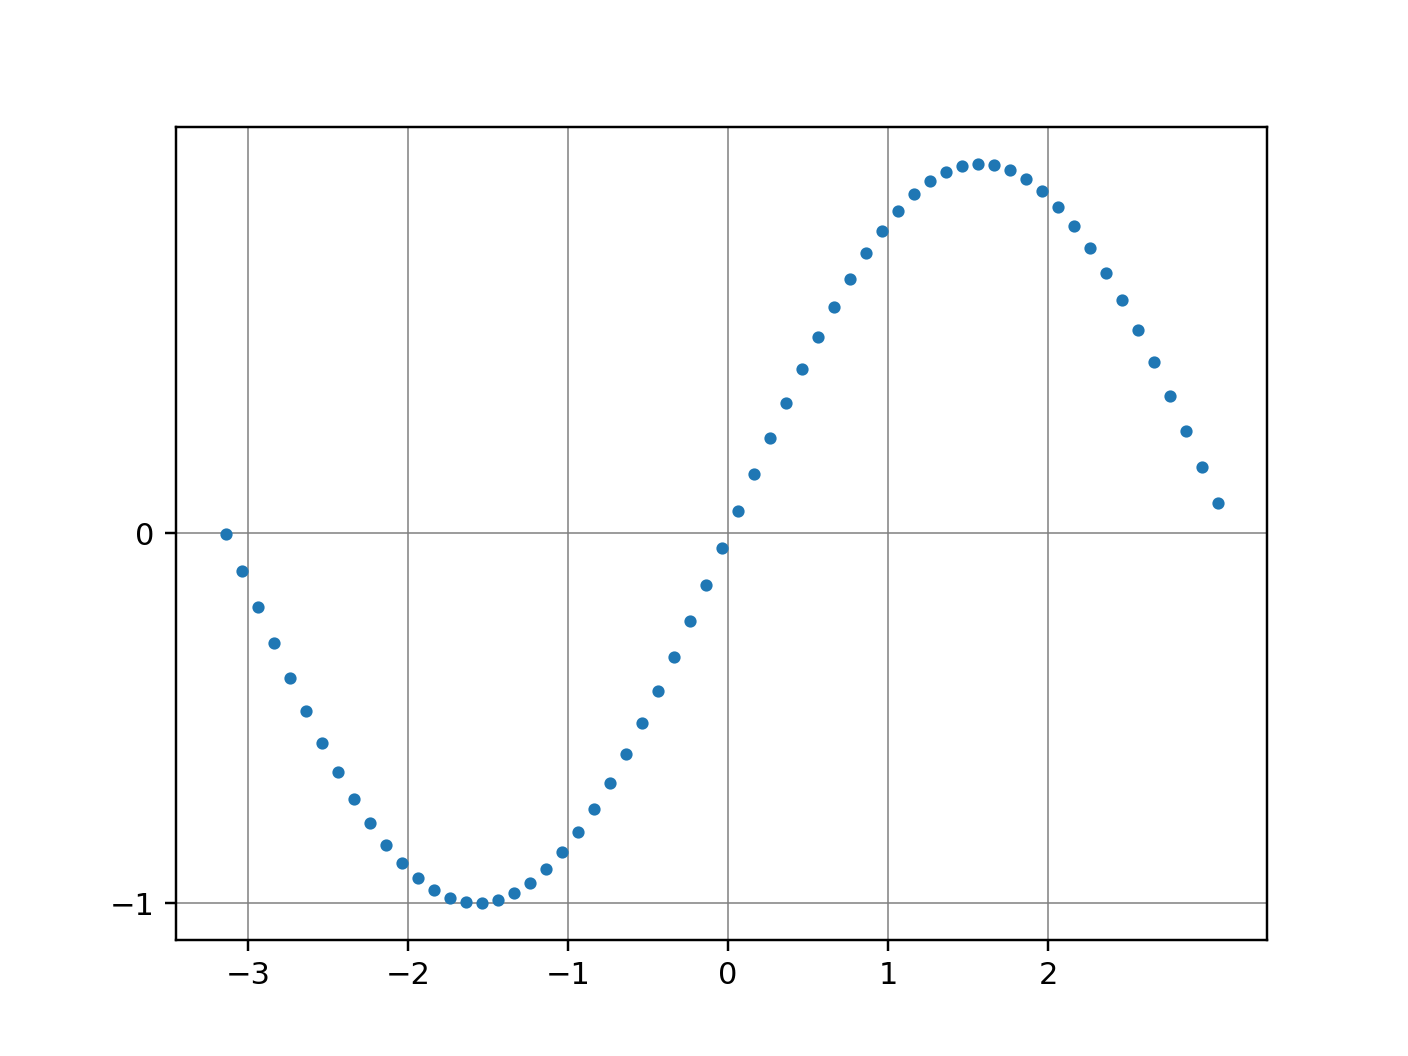

In [127]:
# 1枚ずつ描画し、アニメにする
fig = plt.figure()
ims = []
for i in range(10):
        rand = np.random.randn(100)
        im = plt.plot(rand,'b')
        ims.append(im)

anim1 = animation.ArtistAnimation(fig, ims,interval=100)

rc('animation', html='jshtml')
anim1

<IPython.core.display.Javascript object>


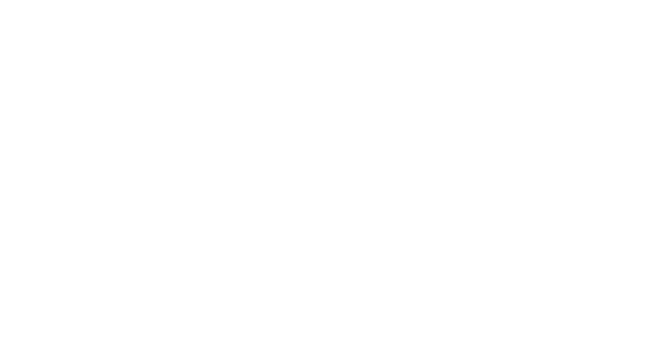

In [128]:
# 関数を定義して、1枚ずつ呼び出して、アニメにする
size = 100
x = np.arange(size)
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(( 0, size))
ax.set_ylim((-3, 3))
line, = ax.plot([],[],'b')

def animate(i):
  yrand=np.random.randn(size)
  line.set_data(x,yrand)
  return (line)

anim2 = animation.FuncAnimation(fig, animate, frames=10, interval=100)
rc('animation', html='jshtml')
anim2

In [129]:
# # For google colab
# anim2 = animation.FuncAnimation(fig, animate, frames=10, interval=100)

# # add code
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # For google colab
# HTML(anim2.to_html5_video())


In [130]:
anim2.save('animation.gif',writer='pillow')

In [131]:
# anim2.save('animation.mp4')

### 5-2 関数のプロット

In [132]:
fig = plt.figure(1)
fig.clf(True)

plt.xticks(np.arange(-3, 3, 1))
plt.yticks(np.arange(-1, 1, 1))
plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

x = np.arange(-3.14, 3.14, 0.1)
y = np.sin(x)
plt.plot(x, y,'.')

<IPython.core.display.Javascript object>


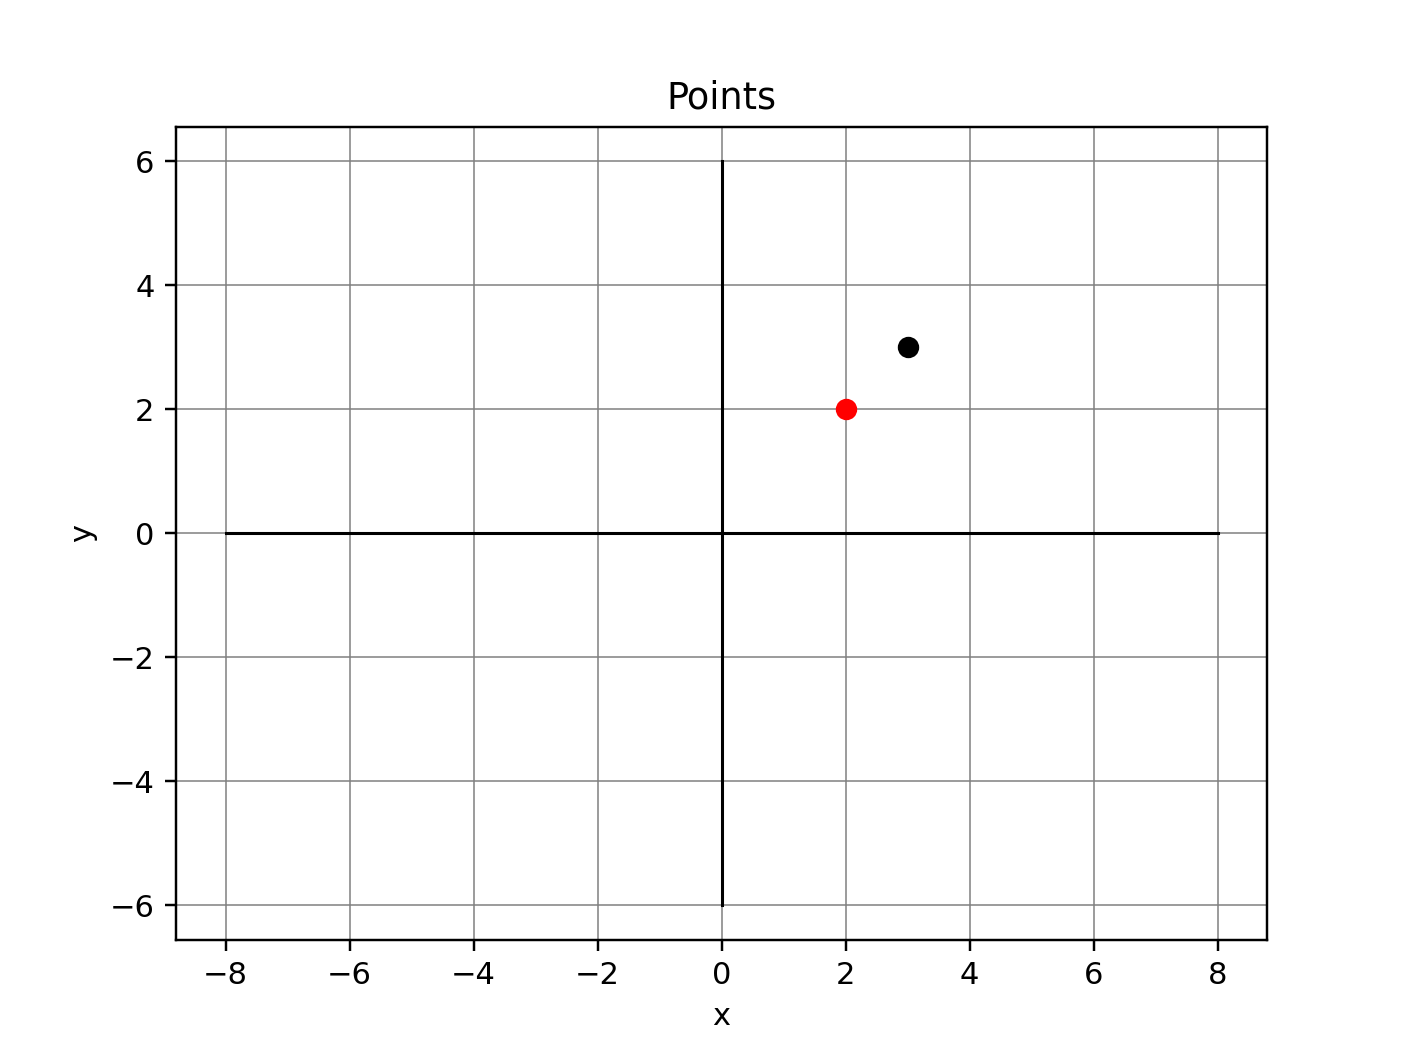

(-5.0, 5.0)

In [133]:
fig = plt.figure(4)
fig.clf(True)

NofD=4
maxR=np.array([-5,5])

plt.xticks(np.arange(maxR[0], maxR[1], 1))
plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

dataD=np.array([[1, -1,-1,1],[1,1,-1,-1]])

plt.plot(dataD[0], dataD[1],'k.',markersize=12)

plt.title("Points")   # title of the plot
plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis

plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

In [134]:
rotA=lambda th: [[np.cos(th), -np.sin(th)],[np.sin(th),np.cos(th)]]
# [MATLAB] rotA=@(th) [cos(th) -sin(th); sin(th) cos(th)];

rotA(np.pi)

[[-1.0, -1.2246467991473532e-16], [1.2246467991473532e-16, -1.0]]

<IPython.core.display.Javascript object>


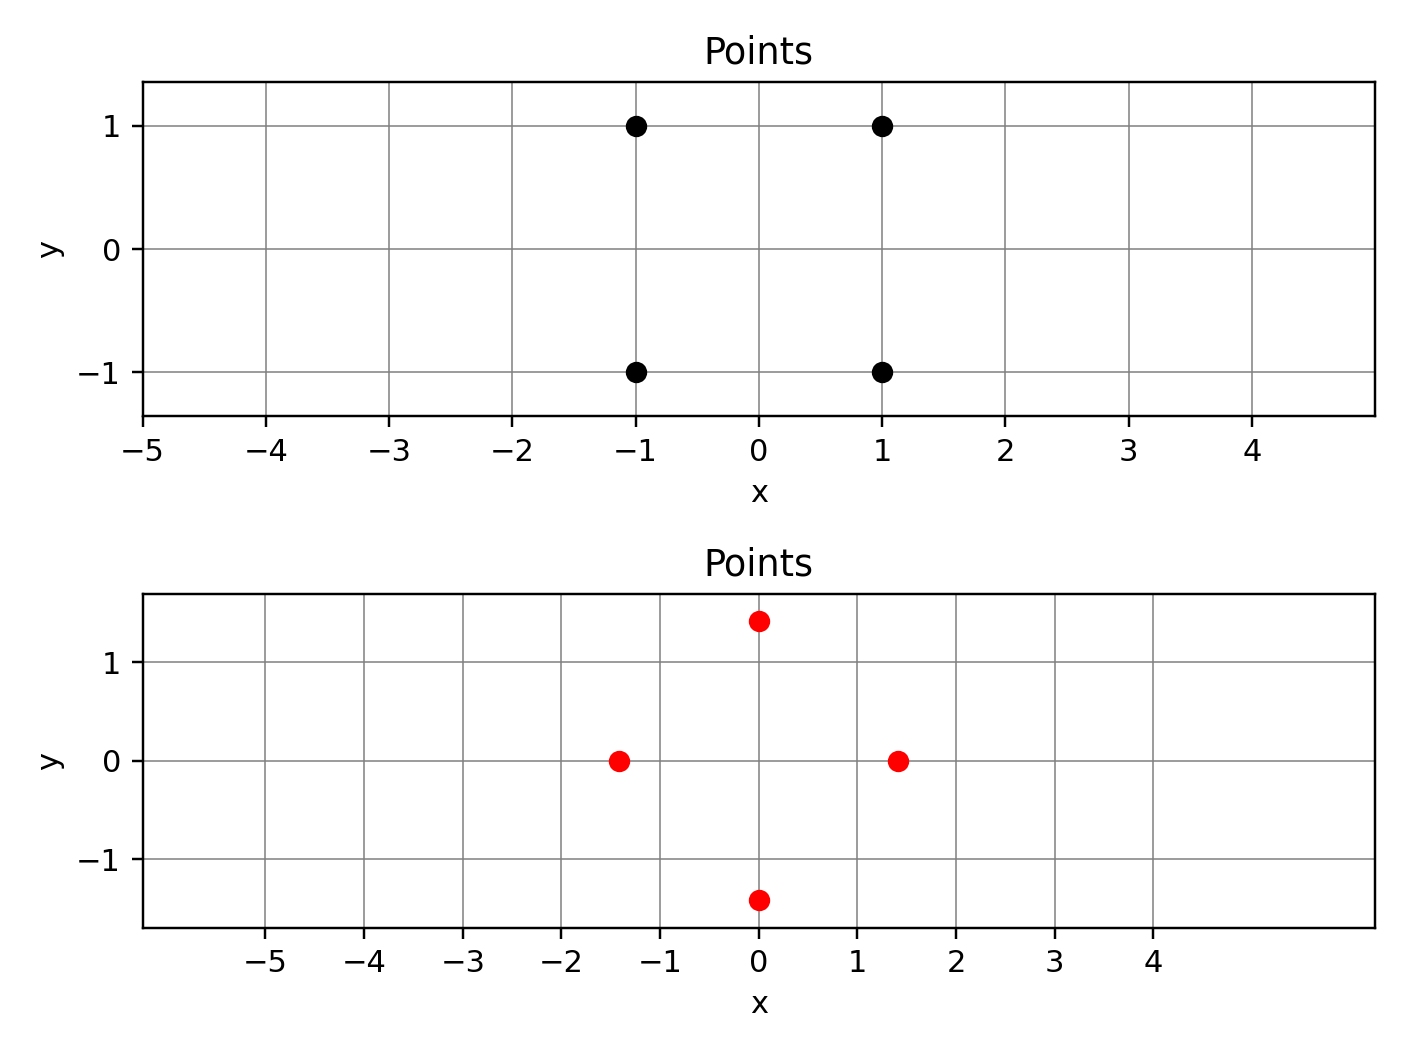

[[ 1 -1 -1  1]
 [ 1  1 -1 -1]]
[[ 1.11022302e-16 -1.41421356e+00 -1.11022302e-16  1.41421356e+00]
 [ 1.41421356e+00  1.11022302e-16 -1.41421356e+00 -1.11022302e-16]]


In [135]:

fig = plt.figure(2)
fig.clf(True)

NofD=4
maxR=np.array([-5,5])


# first figure
ax1 = fig.add_subplot(2, 1, 1)

plt.xticks(np.arange(maxR[0], maxR[1], 1))
plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

plt.title("Points")   # title of the plot
plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis
plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

dataD=np.array([[1, -1,-1,1],[1,1,-1,-1]])
print(dataD)
plt.plot(dataD[0], dataD[1],'k.',markersize=12)

# second figure
ax2 = fig.add_subplot(2, 1, 2)

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)
plt.xticks(np.arange(maxR[0], maxR[1], 1))
plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.title("Points")   # title of the plot
plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis
plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

dataD=np.dot(rotA(np.pi/4),dataD)
print(dataD)
plt.plot(dataD[0], dataD[1],'r.',markersize=12)

fig.tight_layout()

plt.show()



In [136]:
from IPython.display import Math

n_body=1
x =sym.symbols('x_{1:%d}' % (n_body+1))
y =sym.symbols('y_{1:%d}' % (n_body+1))

xyVec=sym.Matrix([x,y])
display(xyVec)

theta=sym.var(r'\theta')
rotM=sym.Matrix([[sym.cos(theta), -sym.sin(theta)],[sym.sin(theta), sym.cos(theta)]])
display(rotM)

display(rotM*xyVec)

display(Math(r'%s%s=%s' % (sym.latex(rotM),sym.latex(xyVec),sym.latex(rotM*xyVec))))


Matrix([
[x_{1}],
[y_{1}]])

Matrix([
[cos(\theta), -sin(\theta)],
[sin(\theta),  cos(\theta)]])

Matrix([
[x_{1}*cos(\theta) - y_{1}*sin(\theta)],
[x_{1}*sin(\theta) + y_{1}*cos(\theta)]])

<IPython.core.display.Math object>

In [137]:
res1=rotM.subs(theta,sym.pi)
display(res1)

res=rotM*xyVec
res2=res.subs(theta,sym.pi)
display(res2)

display(Math(r'%s%s=%s' % (sym.latex(res1),sym.latex(xyVec),sym.latex(res2))))



Matrix([
[-1,  0],
[ 0, -1]])

Matrix([
[-x_{1}],
[-y_{1}]])

<IPython.core.display.Math object>

In [138]:
x[0]

x_{1}

In [139]:
xyVec.subs([(x[0],1),(y[0],1)])

Matrix([
[1],
[1]])

In [140]:
res0=xyVec.subs([(x[0],1),(y[0],1)])
display(res0)

res1=rotM.subs(theta,sym.pi/4)
display(res1)

res=rotM*res0
res2=res.subs(theta,sym.pi/4)
display(res2)

display(Math(r'%s%s=%s' % (sym.latex(res1),sym.latex(res0),sym.latex(res2))))



Matrix([
[1],
[1]])

Matrix([
[sqrt(2)/2, -sqrt(2)/2],
[sqrt(2)/2,  sqrt(2)/2]])

Matrix([
[      0],
[sqrt(2)]])

<IPython.core.display.Math object>

In [141]:
res2[0]

0

In [142]:
ct=np.arange(0,math.pi/4,0.1)
px=math.atan2(1,1)
px+ct

array([0.78539816, 0.88539816, 0.98539816, 1.08539816, 1.18539816,
       1.28539816, 1.38539816, 1.48539816])

<IPython.core.display.Javascript object>


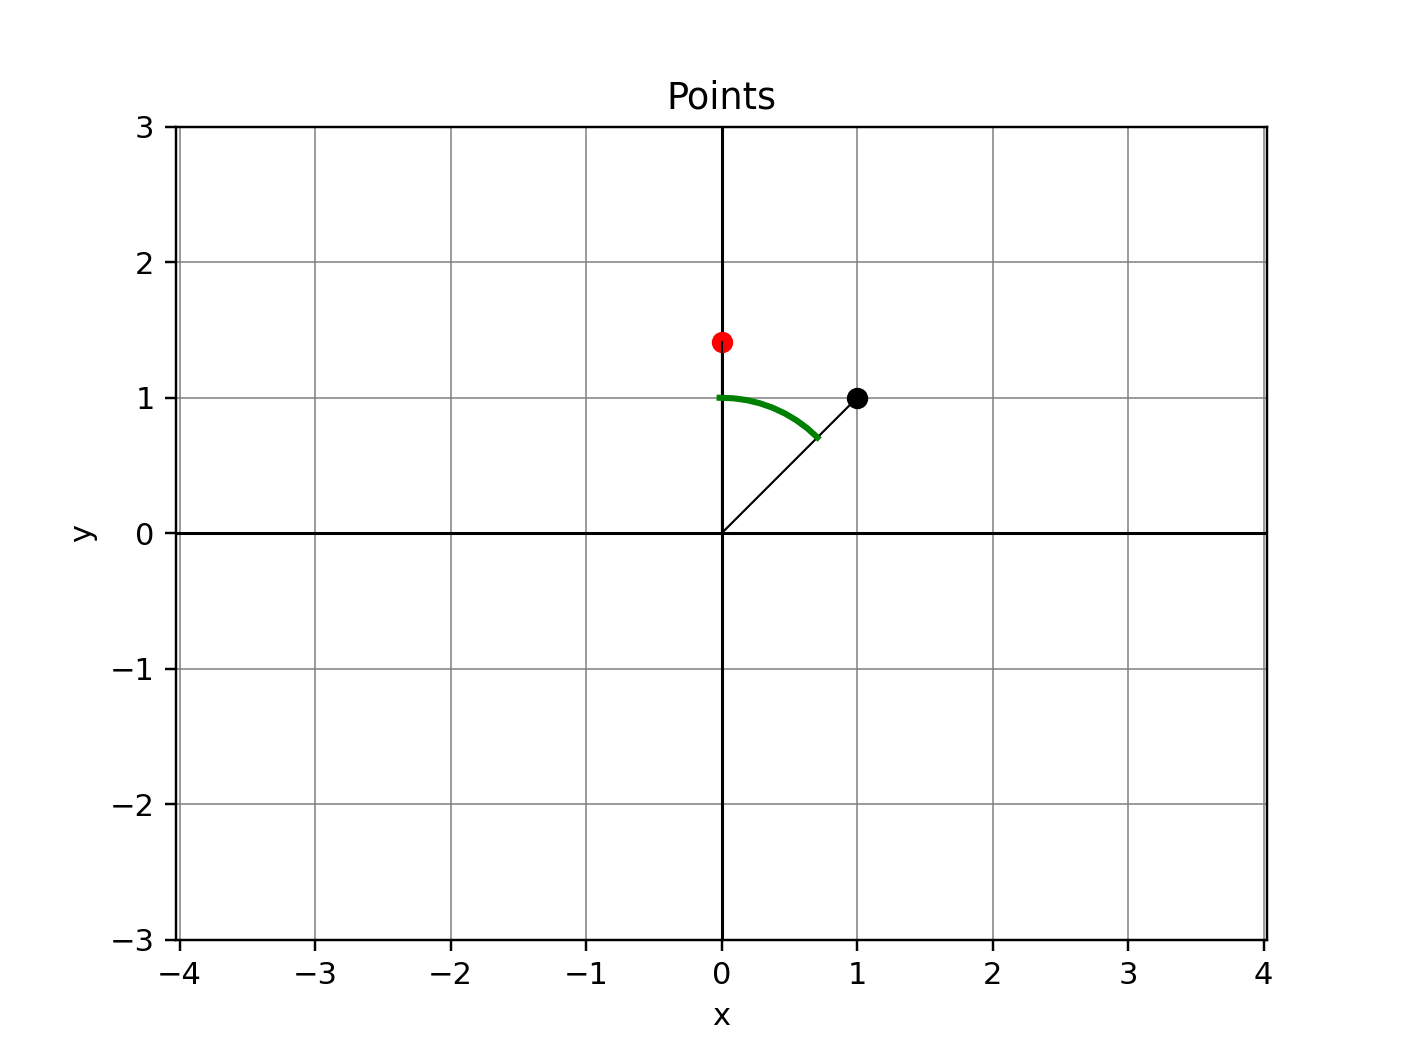

In [143]:
fig = plt.figure(3)
fig.clf(True)

maxR=np.array([-3,3])

# plt.xticks(np.arange(maxR[0], maxR[1], 1))
# plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

plt.title("Points")   # title of the plot
plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis
plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

plt.plot([0,0],maxR,'k-',linewidth=1)
plt.plot(maxR*1.5,[0,0],'k-',linewidth=1)

plt.plot(1,1,'k.',markersize=12)
plt.plot(res2[0],res2[1],'r.',markersize=12)

plt.plot([0,1],[0,1],'k-',linewidth=0.7)
plt.plot([0,res2[0]],[0,res2[1]],'k-',linewidth=0.7)

ct=np.arange(0,(math.pi/4+0.1),0.1)
px=math.atan2(1,1)

plt.plot(np.cos(px+ct),np.sin(px+ct),'g-',linewidth=2)


plt.show()

In [144]:
n_body=4
x =sym.symbols('x_{1:%d}' % (n_body+1))
y =sym.symbols('y_{1:%d}' % (n_body+1))

xyVec=sym.Matrix([x,y])
display(xyVec)

theta=sym.var(r'\theta')
rotM=sym.Matrix([[sym.cos(theta), -sym.sin(theta)],[sym.sin(theta), sym.cos(theta)]])
display(rotM)

display(rotM*xyVec)


Matrix([
[x_{1}, x_{2}, x_{3}, x_{4}],
[y_{1}, y_{2}, y_{3}, y_{4}]])

Matrix([
[cos(\theta), -sin(\theta)],
[sin(\theta),  cos(\theta)]])

Matrix([
[x_{1}*cos(\theta) - y_{1}*sin(\theta), x_{2}*cos(\theta) - y_{2}*sin(\theta), x_{3}*cos(\theta) - y_{3}*sin(\theta), x_{4}*cos(\theta) - y_{4}*sin(\theta)],
[x_{1}*sin(\theta) + y_{1}*cos(\theta), x_{2}*sin(\theta) + y_{2}*cos(\theta), x_{3}*sin(\theta) + y_{3}*cos(\theta), x_{4}*sin(\theta) + y_{4}*cos(\theta)]])

### 4-3　アフィン変換（平行移動、拡大縮小、回転など）
https://imagingsolution.net/imaging/affine-transformation/

In [145]:
theta=sym.var(r'\theta')
xhat,yhat=sym.var(r'\hat{x},\hat{y}')
display(theta)
display(xhat)
display(yhat)

\theta

\hat{x}

\hat{y}

In [146]:
theta=sym.var(r'\theta')
xt,yt=sym.var(r'T_x,T_y')
display(theta)
display(xt)
display(yt)

\theta

T_x

T_y

In [147]:
affSM=sym.Matrix([[1,0,xt],[0,1,yt],[0,0,1]])
affSM

Matrix([
[1, 0, T_x],
[0, 1, T_y],
[0, 0,   1]])

In [148]:
affRM=sym.Matrix([[sym.cos(theta), -sym.sin(theta),0],[sym.sin(theta), sym.cos(theta),0],[0,0,1]])
affRM

Matrix([
[cos(\theta), -sin(\theta), 0],
[sin(\theta),  cos(\theta), 0],
[          0,            0, 1]])

In [149]:
affSM*sym.Matrix([[3],[3],[1]])

Matrix([
[T_x + 3],
[T_y + 3],
[      1]])

In [150]:
(affSM*sym.Matrix([[3],[3],[1]])).subs([(xt,-1),(yt,-1)])

Matrix([
[2],
[2],
[1]])

In [151]:
affS=lambda sx,sy: np.array([[1,0,sx],[0,1,sy],[0,0,1]])
affR=lambda th: np.array([[np.cos(th), -np.sin(th),0],[np.sin(th), np.cos(th),0],[0,0,1]])

In [152]:
preD=np.array([[3,3]]).T
preD

array([[3],
       [3]])

In [153]:
display(affS(-1,-1))

affS(-1,-1).dot(np.vstack([preD,[1]]))

array([[ 1,  0, -1],
       [ 0,  1, -1],
       [ 0,  0,  1]])

array([[2],
       [2],
       [1]])

In [154]:
fig = plt.figure(4)
fig.clf(True)

maxR=np.array([-4,4])

# plt.xticks(np.arange(maxR[0], maxR[1], 1))
# plt.yticks(np.arange(maxR[0], maxR[1], 1))

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

plt.title("Points")   # title of the plot
plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis
# plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

preD=np.array([[3,3]]).T

postD=affS(-1,-1).dot(np.vstack([preD,[1]]))

plt.plot([0,0],maxR*1.5,'k-',linewidth=1)
plt.plot(maxR*2,[0,0],'k-',linewidth=1)

plt.plot(preD[0],preD[1],'k.',markersize=12)
plt.plot(postD[0],postD[1],'r.',markersize=12)
plt.axis('equal')

plt.show()

### リスト3-3　y=3x のグラフ
https://bookplus.nikkei.com/atcl/catalog/19/P95910/

In [155]:
Nb=4
xyN=Nb*2
xID=np.arange(0,xyN,2)
yID=np.arange(1,xyN,2)
print(r'xID:%s, yID:%s'% (xID,yID))
print('~~~')
bodyL=[[-1,0,1],[0,0,0]]
L=np.array([bodyL]*Nb)
print(L)

initP=np.array([[1,2,1,0],[0,1,2,1]])
initTh=np.array([0,0.5,1,1.5])*math.pi

brL=lambda vL: np.array([(v.reshape(3,2)).T for v in np.tile(vL.T,[1,3])])

xID:[0 2 4 6], yID:[1 3 5 7]
~~~
[[[-1  0  1]
  [ 0  0  0]]

 [[-1  0  1]
  [ 0  0  0]]

 [[-1  0  1]
  [ 0  0  0]]

 [[-1  0  1]
  [ 0  0  0]]]


In [156]:
xyN

8

In [157]:
figNum=10
Nb=1
pStep=8
iterN=50
epsD=0.0001

xyN=2*Nb

xyN

2

In [158]:
Nb=1
xyN=Nb*2
xID=np.arange(0,xyN,2)
yID=np.arange(1,xyN,2)

In [159]:
initP=np.array([[3,3]]).T

Lmat=initP

Lmat.reshape(xyN,Nb)[xID,:]

array([[3]])

In [160]:
Lmat

array([[3],
       [3]])

<IPython.core.display.Javascript object>


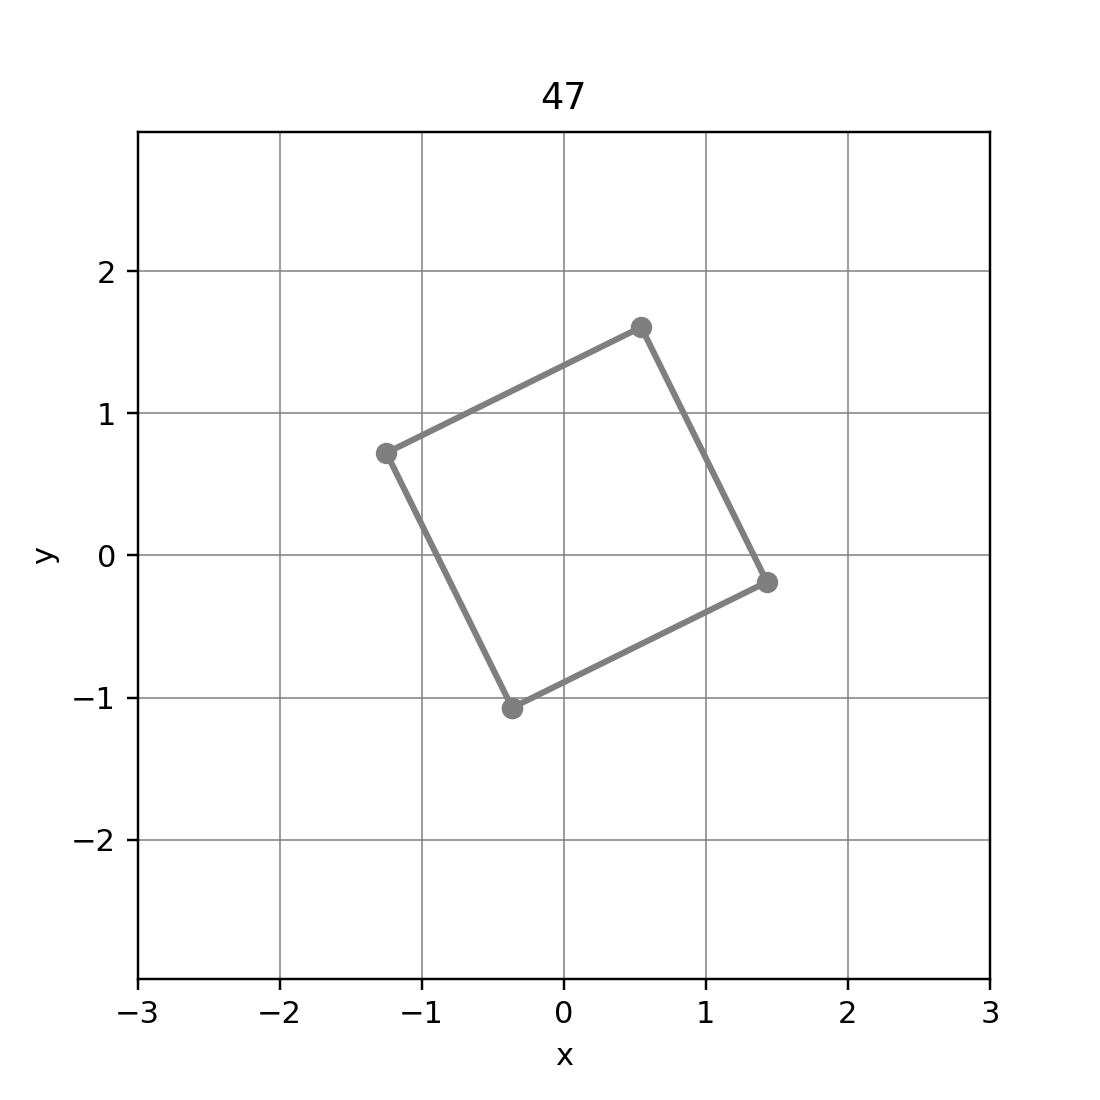

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

maxR=np.array([-3,3])

figNum=10
Nb=1
pStep=8
iterN=100
epsD=0.0001

xyN=2

affS=lambda sx,sy: np.array([[1,0,sx],[0,1,sy],[0,0,1]])
affR=lambda th: np.array([[np.cos(th), -np.sin(th),0],[np.sin(th), np.cos(th),0],[0,0,1]])

initP=np.array([[3,3]]).T
initTh=0

cPosAff=affS(0,0).dot(np.vstack([initP,np.ones([1,Nb])]))
cPos=cPosAff[:2,:]
cTh=initTh

fig = plt.figure(figNum,figsize = (5, 5))
ax=fig.add_subplot()
ax.get_xlim()
plot_frames = []

# def plotP(frame_id,pramA,pramB):
fig.clf(True)
plt.cla()                      #  clearn-up the current plot

# plt.xticks(np.arange(maxR[0], maxR[1], 1))
# plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis

plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

flagR=0

for step in range(iterN):
  # angD=step/pStep*np.pi
  # cTh=initTh+angD

    if np.sum(np.abs(np.mean(cPos.T-[[1,1]],axis=1)))<=epsD:
        flagR=1
    if flagR==0:    
#     if np.sum(np.abs(np.mean(cPos,axis=1)))>epsD:
        cPosAff=affS(-0.1,-0.1).dot(cPosAff)
        cPos=cPosAff[:2,:]
    else:
        cPosAff=affR(0.1).dot(cPosAff)
        cPos=cPosAff[:2,:]
        cTh=cTh+0.1

#     Lmat=brL(cPos)+(np.array(npRot(*cTh)))@L
    Lmat=cPos

    cmaxRx=ax.get_xlim()
    cmaxRy=ax.get_ylim()
    
    cmaxRx=(-3,3)
    cmaxRy=(0,3)
#     ax.xlim(maxR)   # range in x axis
#     ax.ylim(maxR)     # range in x axis


#     t_plot=plt.text(np.mean(cmaxRx), cmaxRy[1]*2.02,str(step), ha='center', va='bottom', fontsize='large')
    t_plot=plt.text(np.mean(cmaxRx), cmaxRy[1]*1.028,str(step), ha='center', va='bottom', fontsize='large')
    each_plot=plt.plot((Lmat.reshape(xyN,Nb)[xID,:]).T, (Lmat.reshape(xyN,Nb)[yID,:]).T,'.-',linewidth=2, markersize=12)
    plot_frames.append(each_plot+[t_plot])                  # append the frame to array
  # print(ax.get_xlim())

pramA=0.5
pramB='Bodies'
# animatedP = animation.FuncAnimation(fig, plotP, fargs = (pramA, pramB), interval=100,frames = 20)
animatedP = animation.ArtistAnimation(fig, plot_frames, interval=iterN)
rc('animation', html='jshtml')
animatedP

In [162]:
initP=np.array([[1,-1,-1,1],[1,1,-1,-1]])
initP

array([[ 1, -1, -1,  1],
       [ 1,  1, -1, -1]])

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


maxR=np.array([-3,3])

figNum=10
Nb=5
pStep=8
iterN=100
epsD=0.0001

xyN=2

affS=lambda sx,sy: np.array([[1,0,sx],[0,1,sy],[0,0,1]])
affR=lambda th: np.array([[np.cos(th), -np.sin(th),0],[np.sin(th), np.cos(th),0],[0,0,1]])

# initP=np.array([[3,3]]).T
initP=np.array([[2,0,0,2,2],[2,2,0,0,2]])
initTh=0

cPosAff=affS(0,0).dot(np.vstack([initP,np.ones([1,Nb])]))
cPos=cPosAff[:2,:]
cTh=initTh

fig = plt.figure(figNum,figsize = (5, 5))
fig.clf(True)
ax=fig.add_subplot()
ax.get_xlim()
plot_frames = []

# def plotP(frame_id,pramA,pramB):
fig.clf(True)
plt.cla()                      #  clearn-up the current plot

# plt.xticks(np.arange(maxR[0], maxR[1], 1))
# plt.yticks(np.arange(maxR[0], maxR[1], 1))
plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)

plt.xlabel("x")      # label in x axis
plt.ylabel("y")      # label in y axis

plt.xlim(maxR)   # range in x axis
plt.ylim(maxR)     # range in x axis

flagR=0

for step in range(iterN):
  # angD=step/pStep*np.pi
  # cTh=initTh+angD

    if np.sum(np.abs(np.mean(cPos,axis=1)))>epsD:
        cPosAff=affS(-0.1,-0.1).dot(cPosAff)
        cPos=cPosAff[:2,:]
    else:
        cPosAff=affR(0.1).dot(cPosAff)
        cPos=cPosAff[:2,:]
        cTh=cTh+0.1

#     Lmat=brL(cPos)+(np.array(npRot(*cTh)))@L
    Lmat=cPos

    cmaxRx=ax.get_xlim()
    cmaxRy=ax.get_ylim()
    
    cmaxRx=(-3,3)
    cmaxRy=(0,3)
    plt.xlim(maxR)   # range in x axis
    plt.ylim(maxR)     # range in x axis

#     t_plot=plt.text(np.mean(cmaxRx), cmaxRy[1]*2.02,str(step), ha='center', va='bottom', fontsize='large')
    t_plot=plt.text(np.mean(cmaxRx), cmaxRy[1]*1.028,str(step), ha='center', va='bottom', fontsize='large')
    each_plot=plt.plot((Lmat.reshape(xyN,Nb)[xID,:]).T, (Lmat.reshape(xyN,Nb)[yID,:]).T,'.-',linewidth=2, markersize=12)
    plot_frames.append(each_plot+[t_plot])                  # append the frame to array
  # print(ax.get_xlim())

pramA=0.5
pramB='Bodies'
# animatedP = animation.FuncAnimation(fig, plotP, fargs = (pramA, pramB), interval=100,frames = 20)
animatedP = animation.ArtistAnimation(fig, plot_frames, interval=iterN)
rc('animation', html='jshtml')
animatedP

In [164]:
animatedP = animation.ArtistAnimation(fig, plot_frames, interval=iterN)
rc('animation', html='jshtml')
animatedP

### その他